In [3]:
import pandas as pd

# Load datasets
customers = pd.read_csv(r"C:\Users\VIVEK KUMAR SINGH\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\VIVEK KUMAR SINGH\Downloads\Products.csv")
transactions = pd.read_csv(r'C:\Users\VIVEK KUMAR SINGH\Downloads\Transactions.csv')

# Preview the data
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Drop duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
# Example: Distribution of customers by region
region_distribution = customers['Region'].value_counts()
print(region_distribution)

# Example: Total revenue
total_revenue = transactions['TotalValue'].sum()
print(f"Total Revenue: {total_revenue}")

# Example: Most popular products
# Merge transactions with products to include product details
merged_data = pd.merge(transactions, products, on='ProductID')

# Group by ProductID, summing quantities, and fetching product details
popular_products = (
    merged_data.groupby(['ProductID', 'ProductName', 'Category'])['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Display the top products with their details
print(popular_products)



Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
Total Revenue: 689995.56
  ProductID            ProductName     Category  Quantity
0      P059        SoundWave Jeans     Clothing        46
1      P054     SoundWave Cookbook        Books        46
2      P029     TechPro Headphones  Electronics        45
3      P079         ActiveWear Rug   Home Decor        43
4      P061    HomeSense Desk Lamp   Home Decor        43
5      P057  ActiveWear Smartphone  Electronics        43
6      P048       TechPro Cookbook        Books        43
7      P062        HomeSense Novel        Books        39
8      P020      ActiveWear Jacket     Clothing        38
9      P028    HomeSense Desk Lamp   Home Decor        38


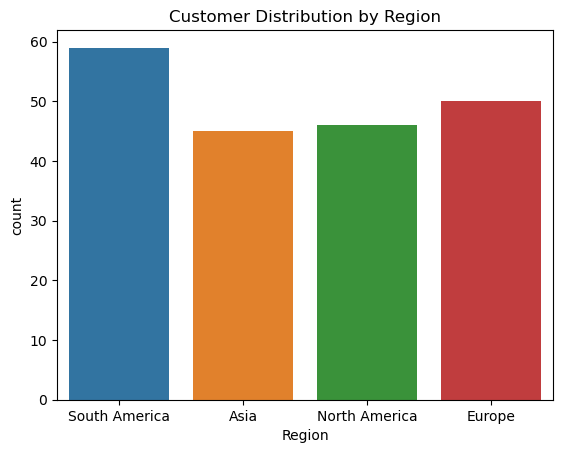

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Region distribution
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

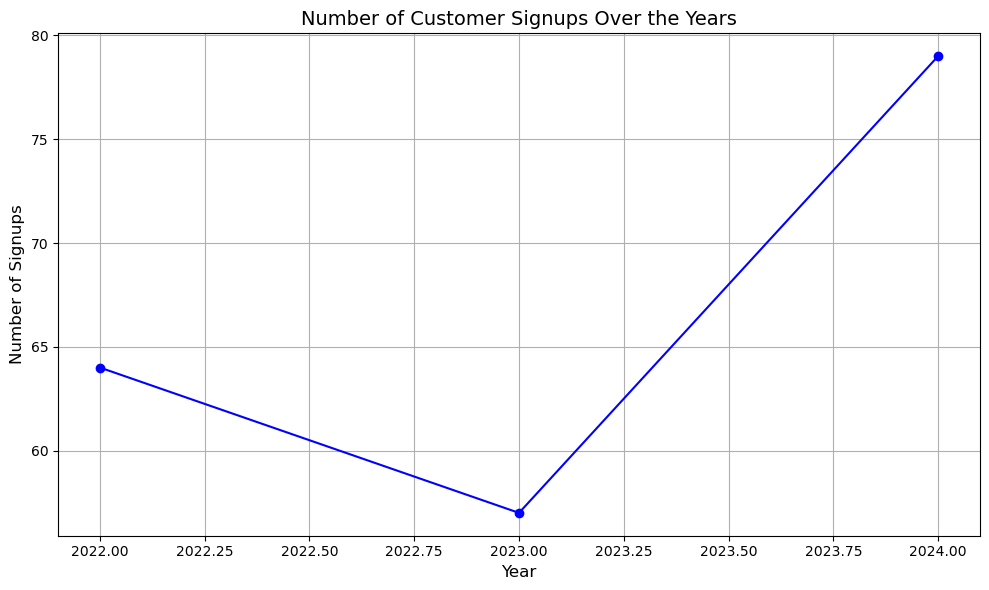

In [9]:
import matplotlib.pyplot as plt

# Extract the year from the SignupDate column
customers['SignupYear'] = customers['SignupDate'].dt.year

# Count the number of signups per year
signups_per_year = customers['SignupYear'].value_counts().sort_index()

# Plot the signups over the years
plt.figure(figsize=(10, 6))
plt.plot(signups_per_year.index, signups_per_year.values, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Number of Customer Signups Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


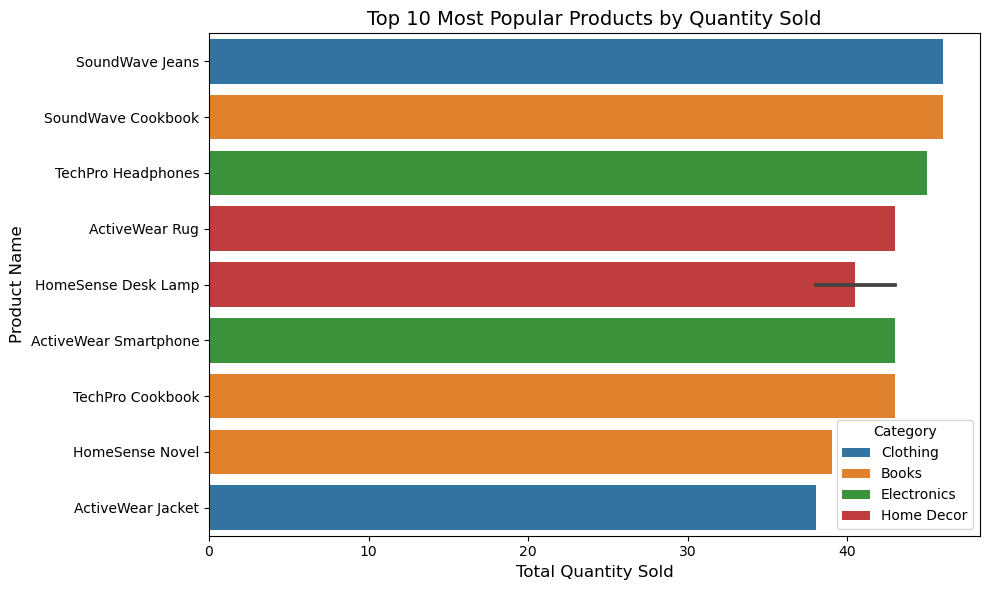

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the most popular products
plt.figure(figsize=(10, 6))
sns.barplot(
    data=popular_products, 
    x='Quantity', 
    y='ProductName', 
    hue='Category', 
    dodge=False
)

# Add titles and labels
plt.title('Top 10 Most Popular Products by Quantity Sold', fontsize=14)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.legend(title='Category', loc='lower right')
plt.tight_layout()

# Show plot
plt.show()


  ProductID               ProductName     Category  TotalValue
0      P029        TechPro Headphones  Electronics    19513.80
1      P079            ActiveWear Rug   Home Decor    17946.91
2      P048          TechPro Cookbook        Books    17905.20
3      P020         ActiveWear Jacket     Clothing    15060.92
4      P062           HomeSense Novel        Books    14592.24
5      P059           SoundWave Jeans     Clothing    13947.20
6      P039        TechPro Smartwatch  Electronics    13778.88
7      P083     ActiveWear Smartwatch  Electronics    13671.60
8      P019     ComfortLiving Sweater     Clothing    13487.95
9      P041  ComfortLiving Smartphone  Electronics    13232.12


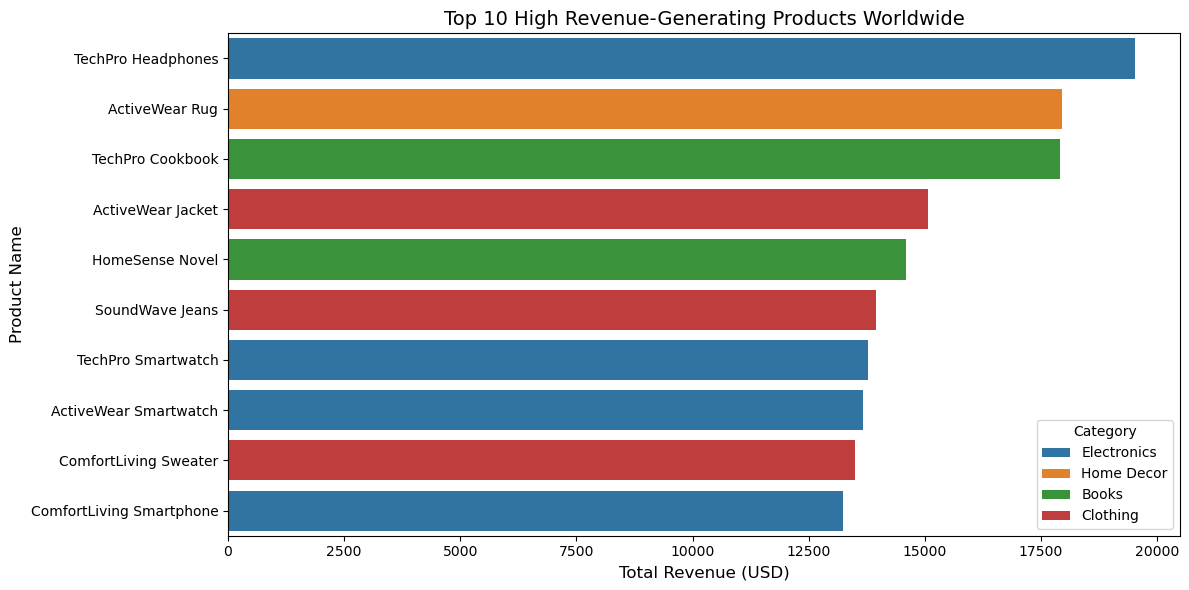

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge transactions with products to include product details
merged_data = pd.merge(transactions, products, on='ProductID')

# Group by ProductID and calculate total revenue
high_revenue_products = (
    merged_data.groupby(['ProductID', 'ProductName', 'Category'])['TotalValue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Display high revenue-generating products
print(high_revenue_products)

# Plot high revenue-generating products
plt.figure(figsize=(12, 6))
sns.barplot(
    data=high_revenue_products, 
    x='TotalValue', 
    y='ProductName', 
    hue='Category', 
    dodge=False
)

# Add titles and labels
plt.title('Top 10 High Revenue-Generating Products Worldwide', fontsize=14)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.legend(title='Category', loc='lower right')
plt.tight_layout()

# Show plot
plt.show()


          Region            ProductName  Quantity
0           Asia      HomeSense T-Shirt        28
1         Europe         ActiveWear Rug        30
2  North America   SoundWave Headphones        37
3  South America  ActiveWear Smartwatch        38


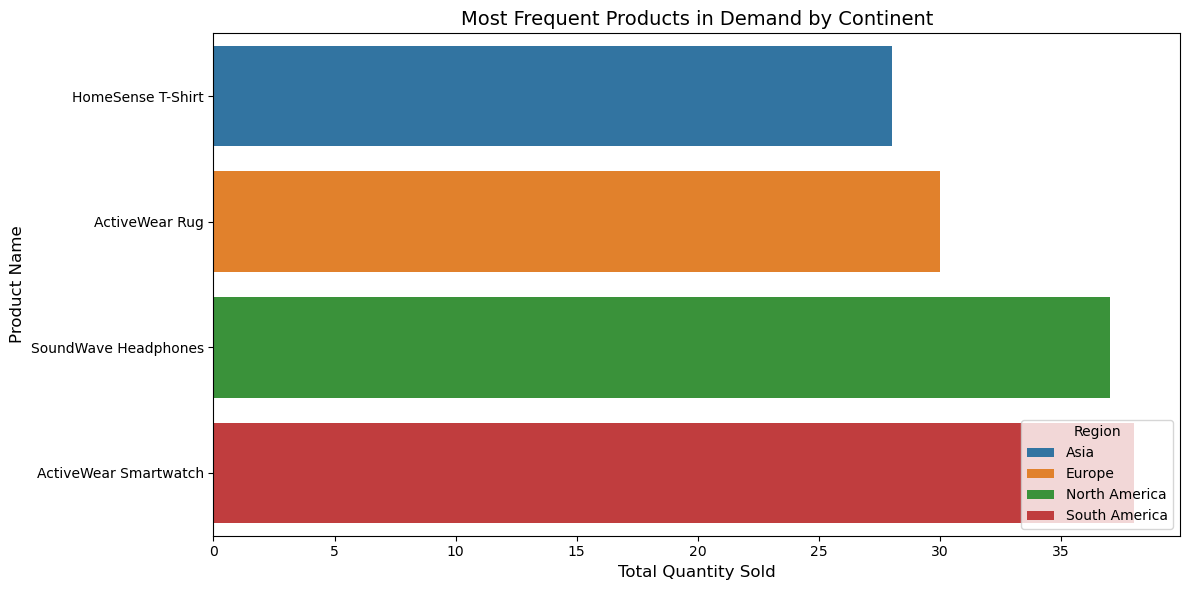

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge customers, transactions, and products to include region and product details
merged_data = pd.merge(transactions, products, on='ProductID')
merged_data = pd.merge(merged_data, customers, on='CustomerID')

# Group by Region and ProductName to count occurrences
product_demand = (
    merged_data.groupby(['Region', 'ProductName'])['Quantity']
    .sum()
    .reset_index()
)

# Identify the most demanded product in each region
most_demanded_products = (
    product_demand.loc[product_demand.groupby('Region')['Quantity'].idxmax()]
    .reset_index(drop=True)
)

# Display the most demanded products by region
print(most_demanded_products)

# Plot the most demanded products by region
plt.figure(figsize=(12, 6))
sns.barplot(
    data=most_demanded_products, 
    x='Quantity', 
    y='ProductName', 
    hue='Region', 
    dodge=False
)

# Add titles and labels
plt.title('Most Frequent Products in Demand by Continent', fontsize=14)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.legend(title='Region', loc='lower right')
plt.tight_layout()

# Show plot
plt.show()


          Region            ProductName  TotalValue
0           Asia      BookWorld Sweater     7266.20
1         Europe     BookWorld Cookbook     8360.56
2  North America  ActiveWear Smartwatch    10080.99
3  South America  ActiveWear Smartwatch    14226.61


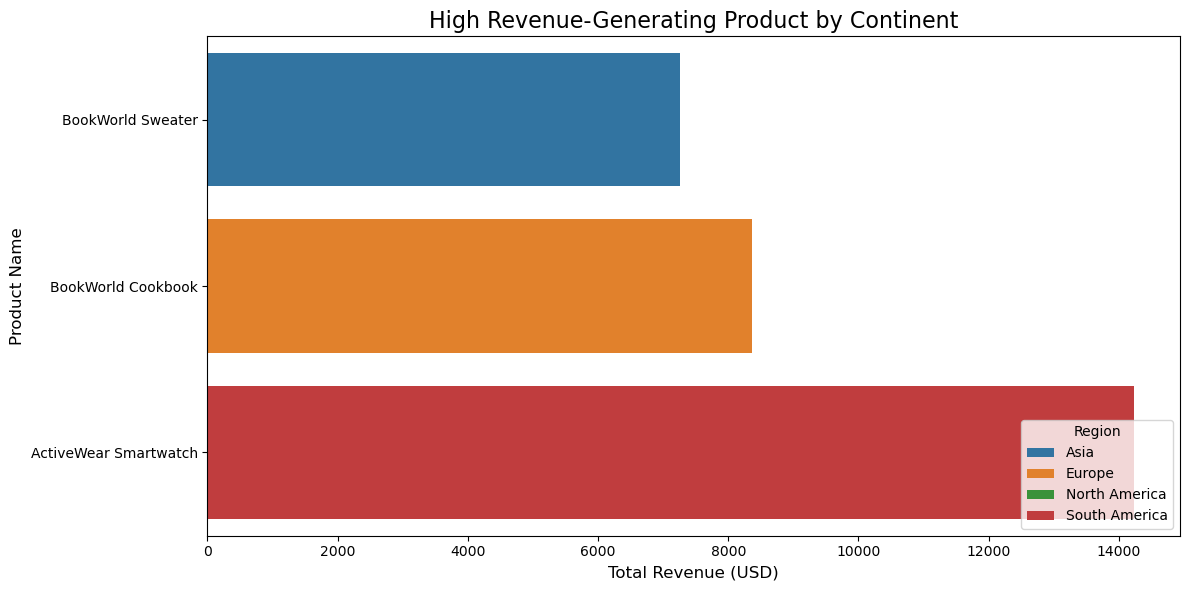

In [17]:
# Group by Region and ProductName to calculate total revenue
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by Region and ProductName, and summing TotalValue
revenue_by_product_region = merged_data.groupby(['Region', 'ProductName'])['TotalValue'].sum().reset_index()

# Identify the product with the highest revenue in each region
high_revenue_products_per_region = revenue_by_product_region.loc[
    revenue_by_product_region.groupby('Region')['TotalValue'].idxmax()
].reset_index(drop=True)

# Display the high revenue-generating product for each region
print(high_revenue_products_per_region)

# Visualization: High revenue-generating products by continent
plt.figure(figsize=(12, 6))
sns.barplot(
    data=high_revenue_products_per_region, 
    x='TotalValue', 
    y='ProductName', 
    hue='Region', 
    dodge=False
)

# Add titles and labels
plt.title('High Revenue-Generating Product by Continent', fontsize=16)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.legend(title='Region', loc='lower right')
plt.tight_layout()

# Show plot
plt.show()



      Category  Quantity
0        Books       681
3   Home Decor       639
2  Electronics       627
1     Clothing       590


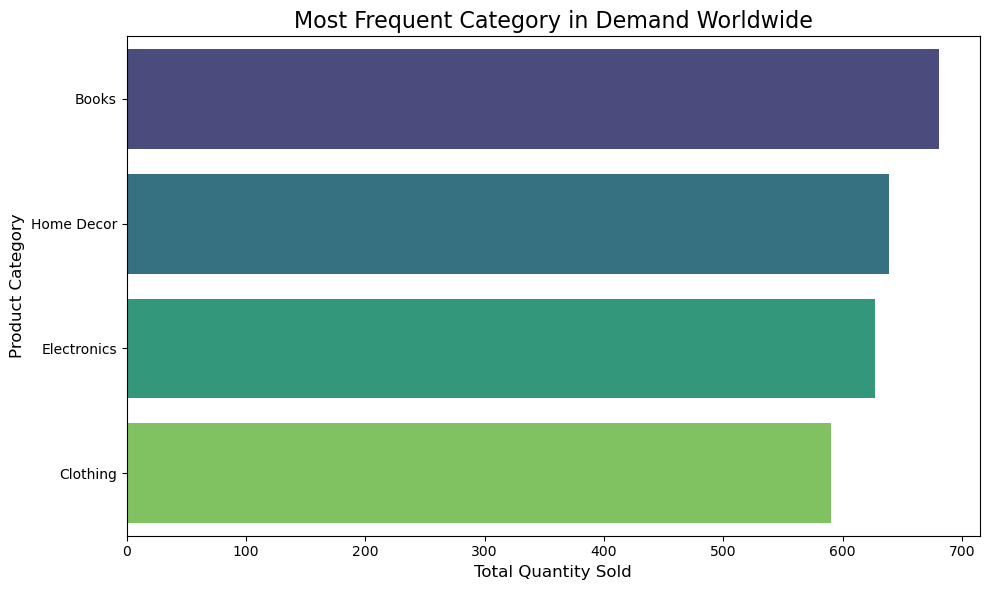

In [18]:
# Merge the data to associate transactions with product categories
merged_data = transactions.merge(products, on='ProductID')

# Group by Category and sum the quantity sold
category_sales = merged_data.groupby('Category')['Quantity'].sum().reset_index()

# Sort the categories by the total quantity sold
category_sales_sorted = category_sales.sort_values(by='Quantity', ascending=False)

# Display the most frequent category
print(category_sales_sorted)

# Plot the most frequent category
plt.figure(figsize=(10, 6))
sns.barplot(
    data=category_sales_sorted,
    x='Quantity',
    y='Category',
    palette='viridis'
)

# Add titles and labels
plt.title('Most Frequent Category in Demand Worldwide', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

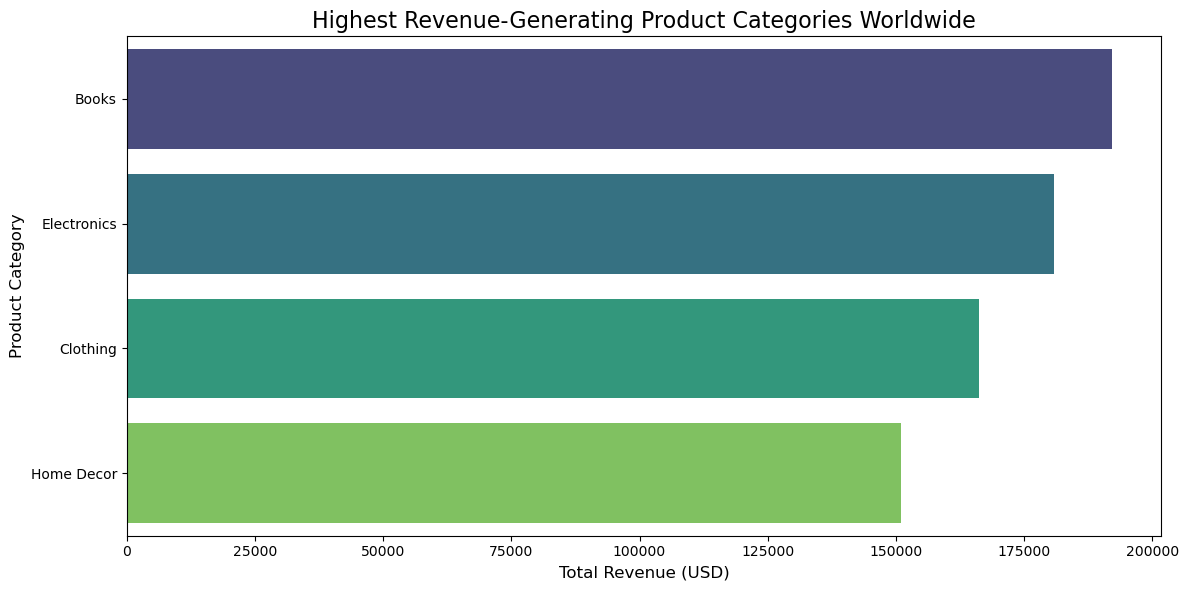

In [19]:
# Merge the datasets to get product categories along with transaction details
merged_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

# Group by product category and sum the total value of transactions
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().reset_index()

# Sort the categories by total revenue in descending order
category_revenue = category_revenue.sort_values(by='TotalValue', ascending=False)

# Plot the highest revenue-generating categories worldwide
plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_revenue, 
    x='TotalValue', 
    y='Category', 
    palette='viridis'
)

# Add titles and labels
plt.title('Highest Revenue-Generating Product Categories Worldwide', fontsize=16)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

          Region    Category  Frequency
0           Asia    Clothing         58
1         Europe  Home Decor         65
2  North America       Books         65
3  South America       Books         90


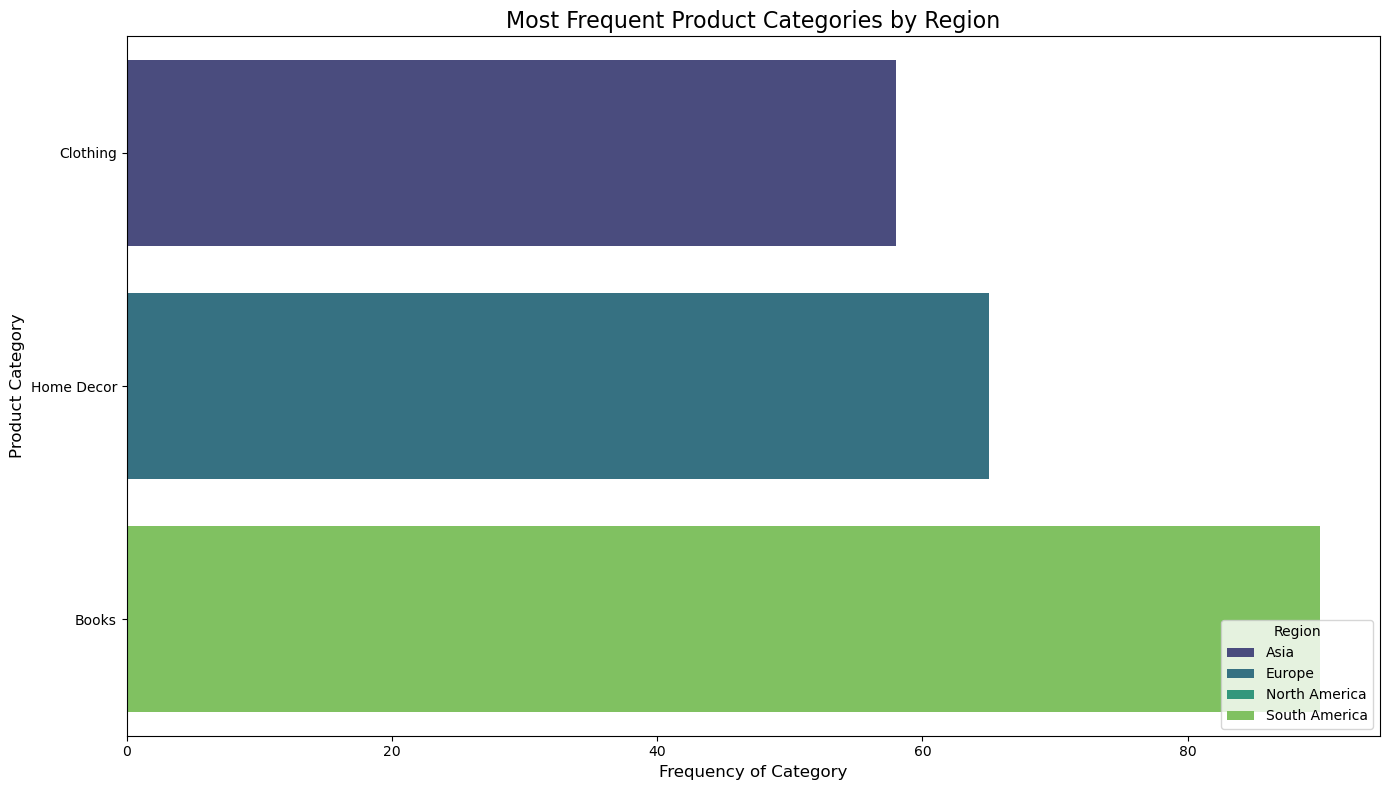

In [28]:
# Merge the datasets to get product categories along with transaction details
# Merge the datasets to get product categories along with transaction details
merged_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

# Count the occurrences of each category per region
category_frequency = merged_data.groupby(['Region', 'Category']).size().reset_index(name='Frequency')

# Identify the most frequent category for each region
most_frequent_category_per_region = category_frequency.loc[
    category_frequency.groupby('Region')['Frequency'].idxmax()
].reset_index(drop=True)

# Display the most frequent categories per region
print(most_frequent_category_per_region)

# Plot the most frequent categories by region
plt.figure(figsize=(14, 8))
sns.barplot(
    data=most_frequent_category_per_region,
    x='Frequency',
    y='Category',
    hue='Region',
    dodge=False,
    palette='viridis'
)

# Add titles and labels
plt.title('Most Frequent Product Categories by Region', fontsize=16)
plt.xlabel('Frequency of Category', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.legend(title='Region', loc='lower right')

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

          Region     Category  TotalValue
0           Asia     Clothing    49353.09
1         Europe        Books    47464.42
2  North America  Electronics    44716.43
3  South America        Books    69752.03


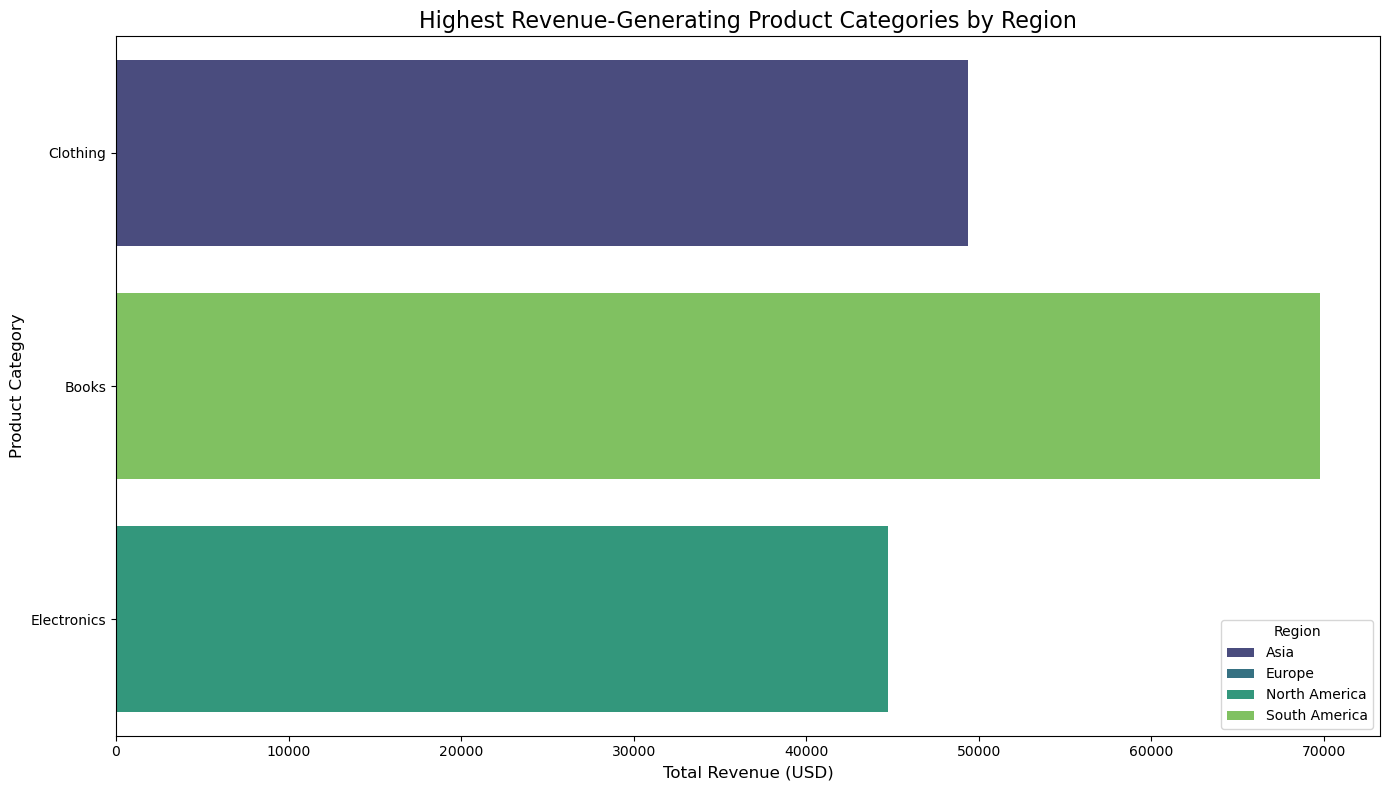

In [29]:
# Merge the datasets to get product categories along with transaction details
merged_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

# Group by region and product category, and sum the total value of transactions
region_category_revenue = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

# Identify the highest revenue-generating category for each region
high_revenue_category_per_region = region_category_revenue.loc[
    region_category_revenue.groupby('Region')['TotalValue'].idxmax()
].reset_index(drop=True)

# Display the highest revenue-generating category per region
print(high_revenue_category_per_region)

# Plot the highest revenue-generating categories by region
plt.figure(figsize=(14, 8))
sns.barplot(
    data=high_revenue_category_per_region,
    x='TotalValue',
    y='Category',
    hue='Region',
    dodge=False,
    palette='viridis'
)

# Add titles and labels
plt.title('Highest Revenue-Generating Product Categories by Region', fontsize=16)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.legend(title='Region', loc='lower right')

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

In [31]:
books = products[products['Category'] == 'Books']

# Print the products under the "Books" category
print(books)

   ProductID                 ProductName Category   Price
0       P001        ActiveWear Biography    Books  169.30
2       P003     ComfortLiving Biography    Books   44.12
6       P007          SoundWave Cookbook    Books  420.15
16      P017         ActiveWear Textbook    Books  469.77
17      P018  ComfortLiving Mystery Book    Books  436.89
23      P024          SoundWave Cookbook    Books  338.66
29      P030         ActiveWear Cookbook    Books  277.86
31      P032          BookWorld Cookbook    Books  488.63
39      P040      SoundWave Mystery Book    Books  153.19
42      P043             SoundWave Novel    Books  404.40
47      P048            TechPro Cookbook    Books  416.40
48      P049            TechPro Textbook    Books  147.95
53      P054          SoundWave Cookbook    Books   57.30
54      P055         BookWorld Biography    Books  128.53
57      P058         ActiveWear Textbook    Books  157.62
61      P062             HomeSense Novel    Books  374.16
62      P063  